In [1]:
import numpy as np
import sys
import re
import os


In [2]:
import pandas as pd

In [ ]:
import numpy as np
import sys
import re

name = sys.argv[1]

# keywords = ["adulter", "affair", "prostitut", "lover", "seduc", "flirt", "intercourse", "sex", "orgasm", "abort", "lesbian", "homosexual", "sin", "kiss", "panty", "panties", "bra",
#             "naked", "porn", "masturbat", "fellatio"]

# keywords = ["lipstick", "manicure", "pretty", "ugly", "attractive", "unattractive", "makeup", "make-up", "make up"]




In [117]:
#Andrea's code

def locate_paragraph_with_keyword(keyword, tokenized_doc, window):
    mask = np.char.startswith(tokenized_doc, keyword)
    matches = np.where(mask)[0]
    for m in matches:
        # keep only the a-zA-Z in the token
        token = tokenized_doc[m]
        if keyword == "bra":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only != keyword:
                continue
        elif keyword == "sin":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only not in ["sin", "sins", "sinned"]:
                continue
        token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
        paragraph = " ".join(token_span)
        yield m, paragraph

In [140]:
#Andrea's code
def count_keyword_matches(keyword, tokenized_doc, window):
    mask = np.char.startswith(tokenized_doc, keyword)
    matches = np.where(mask)[0]
    paragraphs = []
    # count = len(matches)
    for m in matches:
        # keep only the a-zA-Z in the token
        token = tokenized_doc[m]

        if keyword == "bra":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only != keyword:
                continue

        elif keyword == "sin":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only not in ["sin", "sins", "sinned", 'sinners']:
                continue
        token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
        paragraph = " ".join(token_span)
        paragraphs.append(paragraph)

    count = len(paragraphs)
    return count, paragraphs

In [141]:
def keyword_count2(directory, file_name, word):
  count = 0
  full_path = directory + '/' + file_name
  passages = []
  with open(full_path, 'r',errors='ignore') as f:
      for line in f:
          words = line.lower().split()
          for i in words:
            if ( word in i):
                #reduce noise of 'sin' and 'bra'
              if (word =='bra') & (i != word):
                  continue
              elif (word =='sin') & (i not in ["sin", "sins", "sinned", 'sinner', 'sinners']):
                  continue
              else:
                target_index = words.index(i)
                #get 60 words before keyword
                start = max(0, target_index - 60)

                #get 60 words after keyword
                end = min(len(words), target_index + 60 + 1)
                list_passage = words[start:end]




                passages.append(" ".join(list_passage))
                count=count+1


  # if count==0:
  #   count = partial_wordcount
  return count, passages

In [142]:
# def locate_keyword(keyword, tokenized_doc):
#     mask = np.char.startswith(tokenized_doc, keyword)
#     matches = np.where(mask)[0]
#     for m in matches:
#         # keep only the a-zA-Z in the token
#         token = tokenized_doc[m]
#         if keyword == "bra":
#             token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
#             if token_alphabet_only != keyword:
#                 continue
#         elif keyword == "sin":
#             token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
#             if token_alphabet_only not in ["sin", "sins", "sinned"]:
#                 continue
#         token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
#         paragraph = " ".join(token_span)
#         yield m, paragraph

In [143]:
transcript_path = "/content/women"
# transcript_path = "/content/men"

keywords = ['adulter', 'affair', 'prostitut', 'lover', 'seduc','flirt', 'intercourse', 'sex', 'orgasm', 'abort', 'lesbian', 'homosexual', 'sin', 'kiss', 'panty', 'bra', 'naked', 'porn', 'masturbat', 'fellatio']


In [144]:
keywords = ['adulter', 'affair', 'prostitut', 'lover', 'seduc','flirt', 'intercourse', 'sex', 'orgasm', 'abort', 'lesbian', 'homosexual', 'sin', 'kiss', 'panty', 'bra', 'naked', 'porn', 'masturbat', 'fellatio']

In [145]:
# /content/women/Angelina Rodriguez.txt

In [146]:
for doc in os.listdir(transcript_path):
  print(doc)

Maureen McDermott.txt
Blanche Taylor Moore.txt
John Allen.txt
Susan Eubanks.txt
Cathy Sarinana.txt
Belinda Magana.txt
Angelina Rodriguez.txt
Tiffany Moss.txt
Manling Williams.txt
Kimberly Cargill.txt
Donna Roberts.txt
Brenda Andrew.txt
Michelle Michaud.txt
Celeste Carrington.txt
Kerry Dalton.txt
Socorro Caro.txt
Cynthia Coffman.txt
Patricia Blackmon.txt
Veronica Gonzales.txt
Darlie Routier.txt
Wendi Andriano.txt
Sammantha Allen.txt
Taylor Parker.txt
James Pavatt.txt
Antoinette Frank.txt
Christie Michelle Scott.txt
Tierra Capri Gobble.txt
Cherie Rhoades.txt
Tanya Nelson.txt
Erica Sheppard.txt
Brittany Holberg.txt
Michelle Tharp.txt
Margaret Allen.txt
Lisa Graham.txt
Janeen Snyder.txt
Lorraine Hunter.txt
Shawna Forde.txt
Maria Alfaro.txt
Heather Keaton.txt
Tina Brown.txt
James Dickerson.txt
Tiffany Cole.txt
Christa Pike.txt
Melissa Lucio.txt
Valerie Martin.txt
Carlette Parker.txt
Brooke Rottiers.txt
Virginia Caudill.txt
Lisa Chamberlin.txt


In [147]:
df10 = pd.DataFrame(columns= ['document_name', 'keyword', 'count_method1', 'count_method2'])

passages_dict = pd.DataFrame(columns= ['document_name', 'keyword', 'keyword_method' , 'passage' ])


In [148]:
#Andrea's code

for doc in os.listdir(transcript_path):
# if (os.path.splitext(transcript_path)[1].lower() == '.txt'):
  title = doc
  print(title)
  if ".txt" in title:
    doc_path = transcript_path + '/' + doc

    with open(doc_path, "r") as f:
        doc = f.read()
        doc = doc.lower()
    tokenized_doc = doc.split()

    # print(f"defendant\tkeyword\tkeyword_index\tparagraph")

    window = 60
    for keyword in keywords:
        # for index, paragraph in save_paragraph_keyword_lists(keyword, tokenized_doc, window):
        count1, paragraphs = count_keyword_matches(keyword, tokenized_doc, window)
        # print(f"{title}\t{keyword}\t{count}")
        count2, passages = keyword_count2(transcript_path, title, keyword)
        print([title, keyword, count1, count2] )

        #save keyword counts
        df2 = pd.DataFrame([[title, keyword, count1, count2]], columns=['document_name', 'keyword', 'count_method1', 'count_method2'])
        df10 = pd.concat([df10, df2], ignore_index=True)

        #save passages from keyword counts
        m1_count = len(paragraphs)
        doc_name = [title] * m1_count
        k = [keyword] *m1_count
        k_method = ['Method 1'] *m1_count
        method1_pars =  pd.DataFrame({'document_name':doc_name ,'keyword': k , 'keyword_method': k_method, 'passage': paragraphs})
        passages_dict = pd.concat([passages_dict, method1_pars], ignore_index=True)


        m2_count = len(passages)
        doc_name = [title] * m2_count
        k = [keyword] *m2_count
        k_method = ['Method 2'] *m2_count
        method2_pars = pd.DataFrame({'document_name':doc_name, 'keyword': k,  'keyword_method': k_method, 'passage': passages })
        passages_dict = pd.concat([passages_dict, method2_pars], ignore_index=True)




Maureen McDermott.txt
['Maureen McDermott.txt', 'adulter', 0, 0]
['Maureen McDermott.txt', 'affair', 7, 7]
['Maureen McDermott.txt', 'prostitut', 0, 0]
['Maureen McDermott.txt', 'lover', 63, 64]
['Maureen McDermott.txt', 'seduc', 0, 0]
['Maureen McDermott.txt', 'flirt', 0, 0]
['Maureen McDermott.txt', 'intercourse', 1, 1]
['Maureen McDermott.txt', 'sex', 54, 208]
['Maureen McDermott.txt', 'orgasm', 0, 0]
['Maureen McDermott.txt', 'abort', 1, 1]
['Maureen McDermott.txt', 'lesbian', 6, 6]
['Maureen McDermott.txt', 'homosexual', 149, 149]
['Maureen McDermott.txt', 'sin', 0, 0]
['Maureen McDermott.txt', 'kiss', 7, 7]
['Maureen McDermott.txt', 'panty', 0, 0]
['Maureen McDermott.txt', 'bra', 2, 2]
['Maureen McDermott.txt', 'naked', 5, 5]
['Maureen McDermott.txt', 'porn', 1, 1]
['Maureen McDermott.txt', 'masturbat', 2, 2]
['Maureen McDermott.txt', 'fellatio', 0, 0]
Blanche Taylor Moore.txt
['Blanche Taylor Moore.txt', 'adulter', 2, 2]
['Blanche Taylor Moore.txt', 'affair', 16, 16]
['Blanche T

In [149]:
df10.shape

(980, 4)

In [150]:
df10.to_csv('keyword_counts_both_methods_lessnoise.csv')

In [151]:
df10.document_name.unique()

array(['Maureen McDermott.txt', 'Blanche Taylor Moore.txt',
       'John Allen.txt', 'Susan Eubanks.txt', 'Cathy Sarinana.txt',
       'Belinda Magana.txt', 'Angelina Rodriguez.txt', 'Tiffany Moss.txt',
       'Manling Williams.txt', 'Kimberly Cargill.txt',
       'Donna Roberts.txt', 'Brenda Andrew.txt', 'Michelle Michaud.txt',
       'Celeste Carrington.txt', 'Kerry Dalton.txt', 'Socorro Caro.txt',
       'Cynthia Coffman.txt', 'Patricia Blackmon.txt',
       'Veronica Gonzales.txt', 'Darlie Routier.txt',
       'Wendi Andriano.txt', 'Sammantha Allen.txt', 'Taylor Parker.txt',
       'James Pavatt.txt', 'Antoinette Frank.txt',
       'Christie Michelle Scott.txt', 'Tierra Capri Gobble.txt',
       'Cherie Rhoades.txt', 'Tanya Nelson.txt', 'Erica Sheppard.txt',
       'Brittany Holberg.txt', 'Michelle Tharp.txt', 'Margaret Allen.txt',
       'Lisa Graham.txt', 'Janeen Snyder.txt', 'Lorraine Hunter.txt',
       'Shawna Forde.txt', 'Maria Alfaro.txt', 'Heather Keaton.txt',
       'Tina 

In [130]:
# for doc in os.listdir(transcript_path):
#   if ".txt" in doc:
#     defendent_passages = passages_dict[passages_dict['document_name']==doc]
#     defendent_passages.to_csv(doc + '_keyword_passages.csv')


In [131]:
passages_dict.shape

(70107, 4)

In [132]:
passages_dict.to_csv('passages_keywords.csv')

In [133]:
df10.head()

,document_name,keyword,count_method1,count_method2
0,Maureen McDermott.txt,adulter,0,0
1,Maureen McDermott.txt,affair,7,7
2,Maureen McDermott.txt,prostitut,0,0
3,Maureen McDermott.txt,lover,63,64
4,Maureen McDermott.txt,seduc,0,0


In [134]:
passages_dict[(passages_dict['keyword']=='sin') & (passages_dict['keyword_method']== 'Method 1')].shape


(63, 4)

In [152]:
mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']
# women_only = df10[df10['document_name'] not in mens_transcript_titles]

mask = df10['document_name'].isin(mens_transcript_titles)
women_only = df10[~mask]

In [153]:
len(women_only.document_name.unique())

46

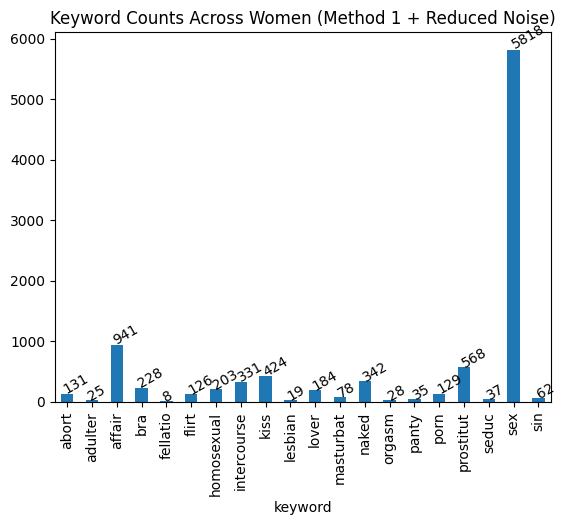

In [154]:
ax = women_only.groupby('keyword')['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)


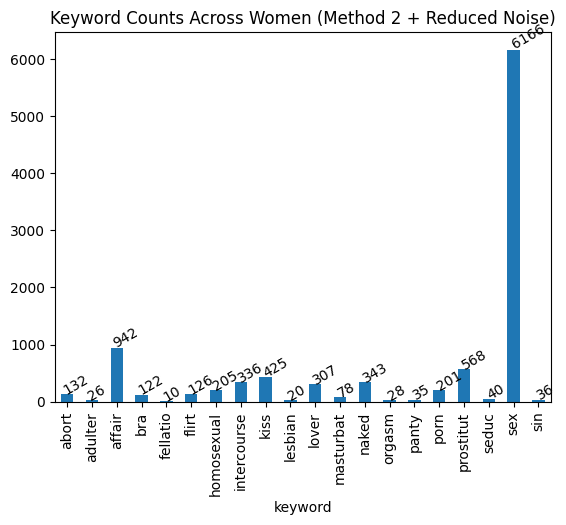

In [155]:
ax = women_only.groupby('keyword')['count_method2'].sum().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

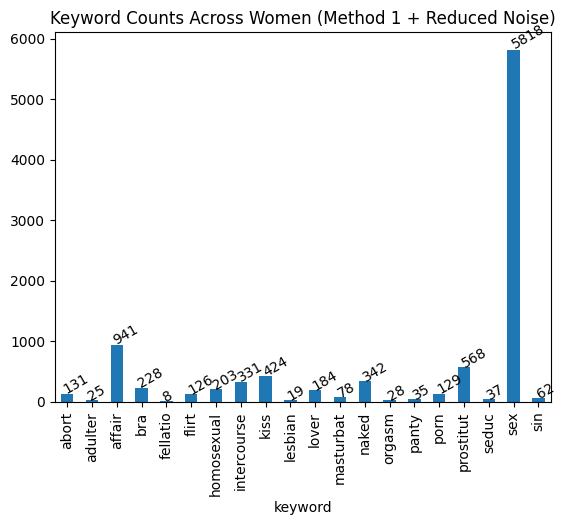

In [156]:
ax = women_only.groupby('keyword')['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)


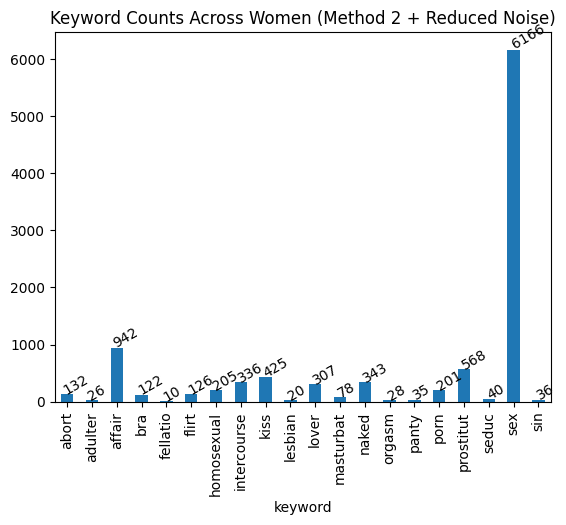

In [157]:
ax = women_only.groupby('keyword')['count_method2'].sum().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

In [158]:
#sanity check- count of passages shoudl equal keyword counts match above,

m1_passages = passages_dict[passages_dict['keyword_method']=='Method 1']
m2_passages = passages_dict[passages_dict['keyword_method']=='Method 2']

mask = m1_passages['document_name'].isin(mens_transcript_titles)
m1_passages = m1_passages[~mask]

mask = m2_passages['document_name'].isin(mens_transcript_titles)
m2_passages = m2_passages[~mask]

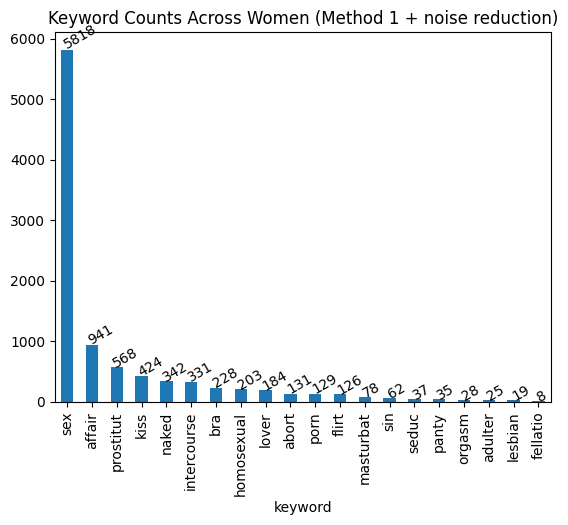

In [159]:
ax =m1_passages.keyword.value_counts().plot(kind='bar', title= 'Keyword Counts Across Women (Method 1 + noise reduction)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)

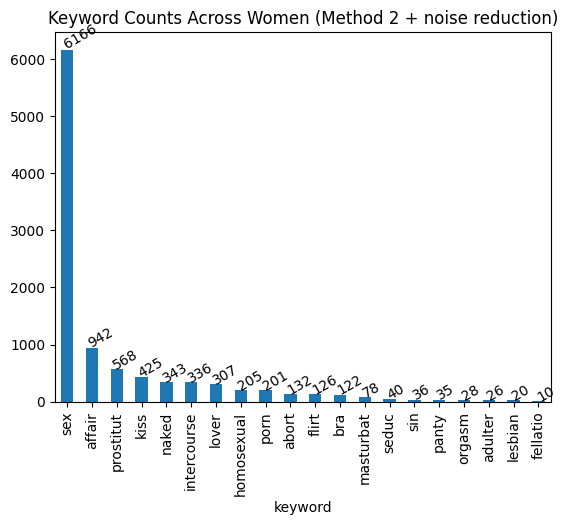

In [160]:
ax =m2_passages.keyword.value_counts().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + noise reduction)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)

In [172]:
#example passages from one defendat
Erica_Sheppard_passages = passages_dict[passages_dict['document_name']=='Erica Sheppard.txt']


In [173]:
Erica_Sheppard_passages.head()

,document_name,keyword,keyword_method,passage
13642,Erica Sheppard.txt,affair,Method 1,"to erica sheppard's life, is relevant; and it ..."
13643,Erica Sheppard.txt,affair,Method 2,"to erica sheppard's life, is relevant; and it ..."
13644,Erica Sheppard.txt,lover,Method 1,"address is 4655 wild indigo, no. 47. i have be..."
13645,Erica Sheppard.txt,lover,Method 1,"wild indigo, no. 47. i have been living with j..."
13646,Erica Sheppard.txt,lover,Method 2,"address is 4655 wild indigo, no. 47. i have be..."


In [174]:
Erica_Sheppard_passages.keyword.unique()

array(['affair', 'lover', 'sex', 'abort', 'homosexual', 'naked'],
      dtype=object)

In [ ]:
["sin", "sins", "sinned", 'sinner', 'sinners']

In [ ]:
Erica_Sheppard_passages[Erica_Sheppard_passages['keyword']=='homosexual']

New Metadata Analysis

In [186]:
meta3 = pd.read_csv('/content/metadata/metadata_cleaning_cols_removed_women.csv')

In [193]:
race_name = meta3[['Name', 'Race/Ethnicity']]

In [194]:
race_name

,Name,Race/Ethnicity
0,Christie Michelle Scott,White
1,Heather Leavell Keaton,"Native American,White,Black"
2,Lisa Carpenter Graham,White
3,Patricia Blackmon,Black
4,Tierra Capri Gobble,White
5,Sammantha Allen,White
6,Shawna Forde,White
7,Wendi Andriano,White
8,Angelina Rodriguez,Latinx
9,Belinda Magaña,Latinx


In [196]:
keywords = df10
keywords['Name'] = keywords['document_name'].apply(lambda x:  x.replace('.txt', ""))
keywords

,document_name,keyword,count_method1,count_method2,Name
0,Maureen McDermott.txt,adulter,0,0,Maureen McDermott
1,Maureen McDermott.txt,affair,7,7,Maureen McDermott
2,Maureen McDermott.txt,prostitut,0,0,Maureen McDermott
3,Maureen McDermott.txt,lover,63,64,Maureen McDermott
4,Maureen McDermott.txt,seduc,0,0,Maureen McDermott
...,...,...,...,...,...
975,Lisa Chamberlin.txt,bra,0,0,Lisa Chamberlin
976,Lisa Chamberlin.txt,naked,3,3,Lisa Chamberlin
977,Lisa Chamberlin.txt,porn,0,0,Lisa Chamberlin
978,Lisa Chamberlin.txt,masturbat,0,0,Lisa Chamberlin


In [202]:
len(sorted(keywords.Name.unique()))

49

In [204]:
sorted(race_name.Name.unique())

['Angelina Rodriguez',
 'Antoinette Frank',
 'Belinda Magaña',
 'Blanche Taylor Moore',
 'Brenda E. Andrew',
 'Brittany Holberg',
 'Brooke Rottiers',
 'Carlette Parker ',
 'Catherine Thompson',
 'Cathy Sarinana',
 'Cherie Rhoades',
 'Christa Pike',
 'Christie Michelle Scott',
 'Cynthia Coffman',
 'Darlie Routier',
 'Donna Marie Roberts',
 'Erica Sheppard',
 'Heather Leavell Keaton',
 'Janeen Snyder',
 'Kerry Dalton',
 'Kimberly Cargill',
 'Linda Carty',
 'Lisa Carpenter Graham',
 'Lisa Jo Chamberlin',
 'Lorraine Alison Hunter',
 'Manling Williams',
 'Margaret Allen',
 'Maria Alfaro',
 'Maureen McDermott',
 'Melissa Lucio',
 'Michelle Michaud',
 'Michelle Sue Tharp',
 'Patricia Blackmon',
 'Robin Lee Row',
 'Sammantha Allen',
 'Shawna Forde',
 'Socorro Caro',
 'Susan Eubanks',
 'Tanya Nelson',
 'Taylor Parker',
 'Tierra Capri Gobble',
 'Tiffany Cole',
 'Tiffany Moss',
 'Tina Brown',
 'Valerie Martin',
 'Veronica Gonzales',
 'Virginia Caudill',
 'Wendi Andriano']

In [205]:
merged_df = keywords.merge(race_name, how = 'inner', on = ['Name'])


In [210]:
merged_df.head()

,document_name,keyword,count_method1,count_method2,Name,Race/Ethnicity
0,Maureen McDermott.txt,adulter,0,0,Maureen McDermott,White
1,Maureen McDermott.txt,affair,7,7,Maureen McDermott,White
2,Maureen McDermott.txt,prostitut,0,0,Maureen McDermott,White
3,Maureen McDermott.txt,lover,63,64,Maureen McDermott,White
4,Maureen McDermott.txt,seduc,0,0,Maureen McDermott,White


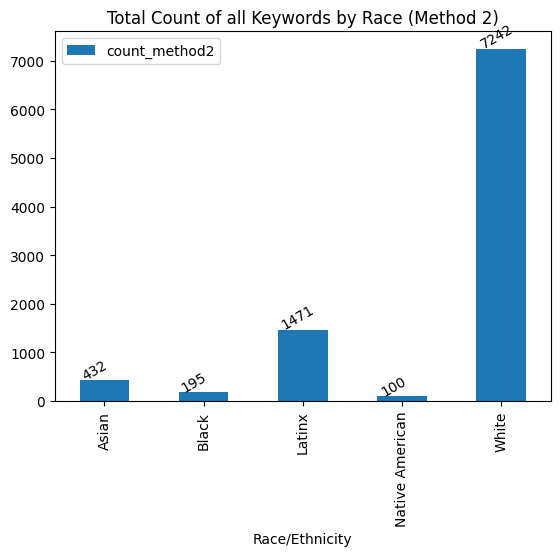

In [215]:
ax = merged_df.groupby(['Race/Ethnicity'])[['keyword','count_method2']].sum().plot(kind='bar', title= 'Total Count of all Keywords by Race (Method 2)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

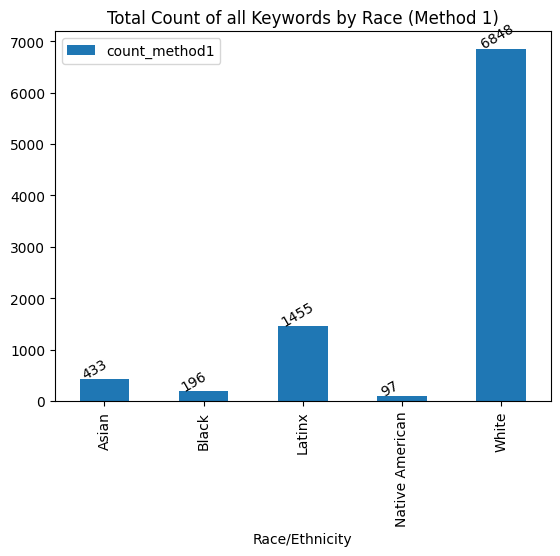

In [217]:
ax = merged_df.groupby(['Race/Ethnicity'])[['keyword','count_method1']].sum().plot(kind='bar', title= 'Total Count of all Keywords by Race (Method 1)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

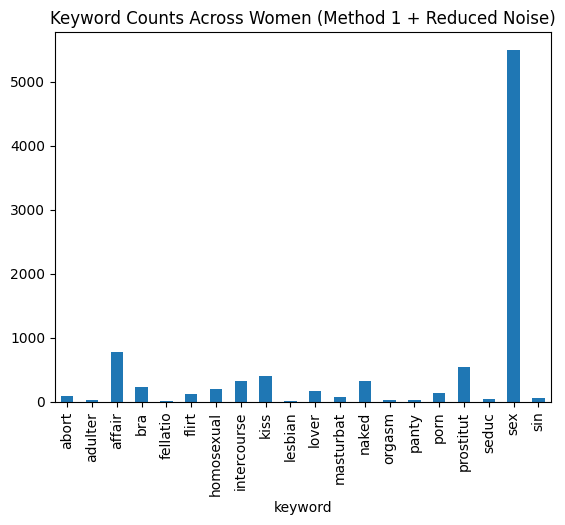

In [228]:
ax = merged_df.groupby(['keyword'])['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)', stacked=True)


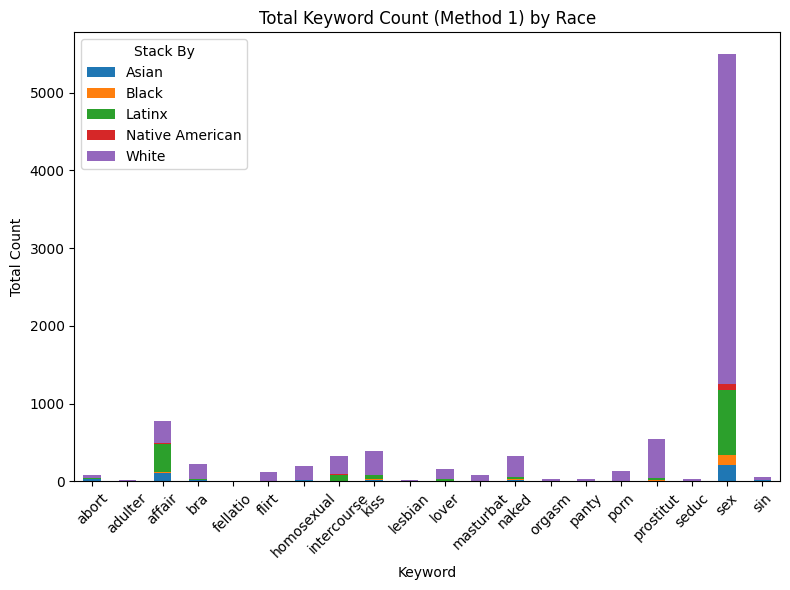

In [236]:
pivot_df = merged_df.pivot_table(index='keyword', columns='Race/Ethnicity', values='count_method1', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Total Keyword Count (Method 1) by Race')
plt.xlabel('Keyword')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Stack By')
plt.tight_layout()
plt.show()

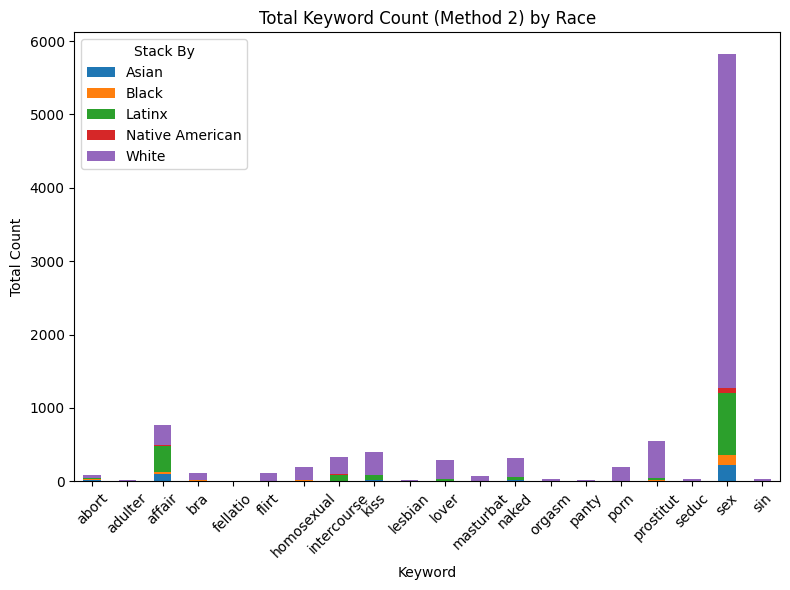

In [237]:
pivot_df = merged_df.pivot_table(index='keyword', columns='Race/Ethnicity', values='count_method2', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Total Keyword Count (Method 2) by Race')
plt.xlabel('Keyword')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Stack By')
plt.tight_layout()